In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/')

In [ ]:
import fp_utilities as fp_util
import plot_utilities as plot_util
import model_architectures as ma

## **Accuracies**

In [ ]:
from sklearn.metrics import accuracy_score

marra_preds = fp_util.get_predictions('Marra', 'median blur')
print("Accuracy of Marra (median) ",accuracy_score(fp_util.ground_truth, marra_preds))
  

Accuracy of Marra (median)  0.63025


In [ ]:
marra_2_preds = fp_util.get_predictions('Marra', 'gaussian blur')
print("Accuracy of Marra (gaussian) ",accuracy_score(fp_util.ground_truth, marra_2_preds))

Accuracy of Marra (gaussian)  0.50475


In [ ]:
yu_preds = fp_util.get_predictions('Yu')
print("Accuracy of Yu ",accuracy_score(fp_util.ground_truth, yu_preds))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of Yu  0.8785


## **Confusion Matrices**

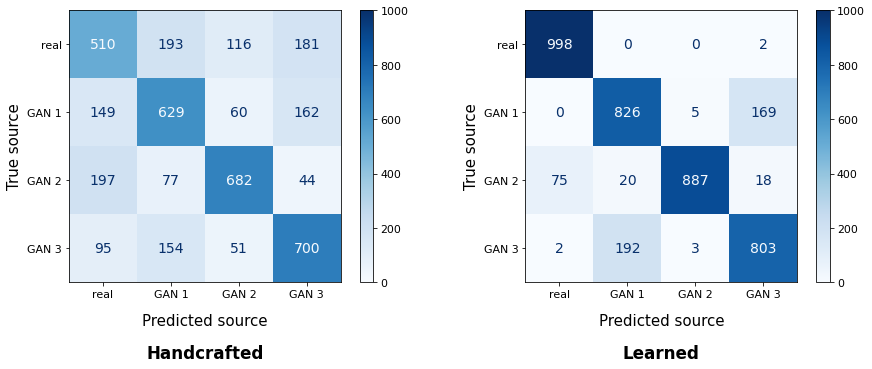

In [ ]:
plt.rcParams['font.size']=14
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
  
fig, ax = plt.subplots(1,2, figsize = (15,5))

plot_util.plot_confusion_matrix('Handcrafted' , marra_preds, ax[0])
plot_util.plot_confusion_matrix('Learned', yu_preds, ax[1])

plt.savefig('conf_matrices.pdf', bbox_inches='tight')


## **Precision and Recall Charts**

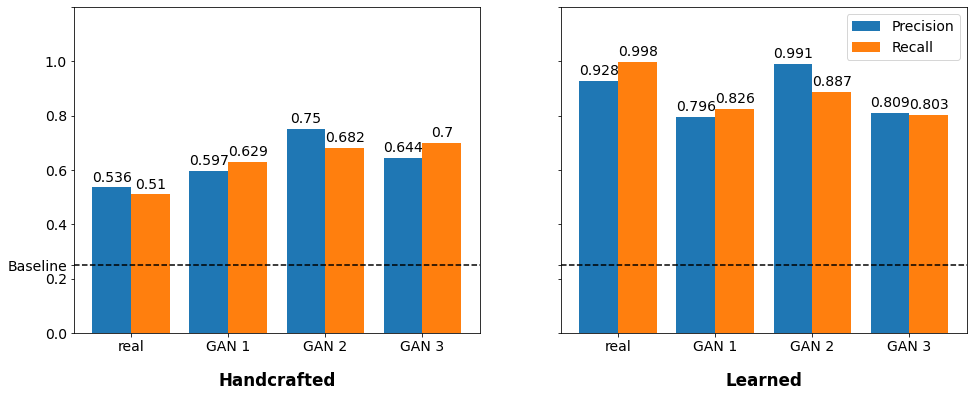

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize']=14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

fig, ax = plt.subplots(1,2, figsize = (16,6))

plot_util.plot_prec_recall_chart('Handcrafted', marra_preds, ax[0])
plot_util.plot_prec_recall_chart('Learned', yu_preds, ax[1], first_plot=False)
plt.savefig('precision_recall_bars.pdf', bbox_inches='tight')

## **Dimensionality Reduction**

### **PCA**

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


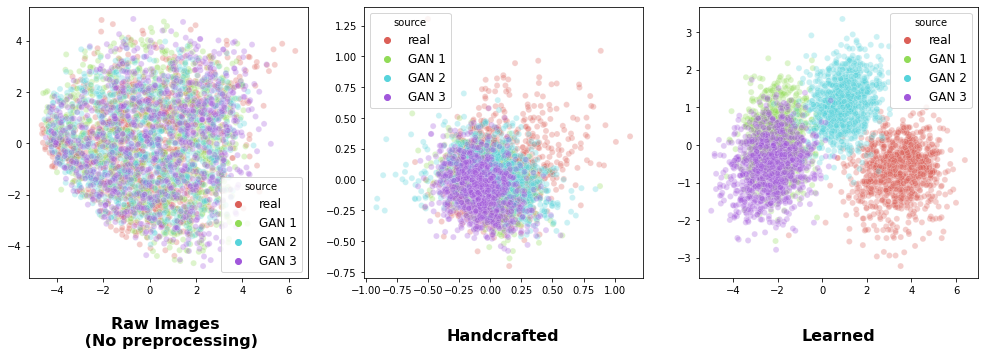

In [ ]:
#visualise PCA dimensionality-reduced test images and fingerprints, coloured by source

 fig,ax = plt.subplots(1,3,figsize=(17,5))

plot_util.visualise_test_img_dist('PCA', ax[0])
plot_util.visualise_fp_dist('Marra','PCA', ax[1])
plot_util.visualise_fp_dist('Yu','PCA', ax[2])

ttl1 = ax[0].title
ttl1.set_text('Raw Images \n (No preprocessing)')

ttl2 = ax[1].title
ttl2.set_text('Handcrafted')

ttl3 = ax[2].title
ttl3.set_text('Learned')

for ttl in [ttl1, ttl2, ttl3]:
  ttl.set_fontweight('bold')
  ttl.set_fontsize(16)
  ttl.set_position([0.5, -0.25])

plt.savefig('pca.pdf', bbox_inches = 'tight')

### **tSNE**

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.059s...
[t-SNE] Computed neighbors for 4000 samples in 1.999s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 2.088933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.758141
[t-SNE] KL divergence after 1000 iterations: 2.214100
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.028s...
[t-SNE] Computed neighbors for 4000 samples in 2.039s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.270667


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.059s...
[t-SNE] Computed neighbors for 4000 samples in 1.693s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 1.197137
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.103592
[t-SNE] KL divergence after 1000 iterations: 2.199253


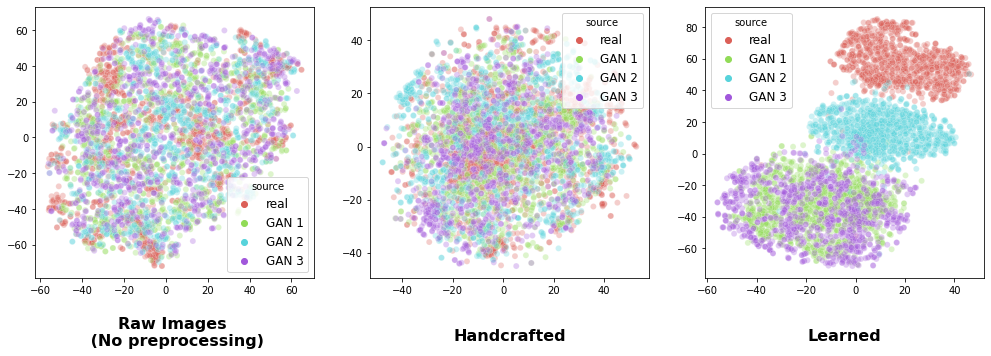

In [ ]:
#visualise tSNE dimensionality-reduced test images and fingerprints, coloured by source

fig,ax = plt.subplots(1,3,figsize=(17,5))

plot_util.visualise_test_img_dist('TSNE', ax[0])
plot_util.visualise_fp_dist('Marra','TSNE', ax[1])
plot_util.visualise_fp_dist('Yu','TSNE', ax[2])

ttl1 = ax[0].title
ttl1.set_text('Raw Images \n (No preprocessing)')

ttl2 = ax[1].title
ttl2.set_text('Handcrafted')

ttl3 = ax[2].title
ttl3.set_text('Learned')

for ttl in [ttl1, ttl2, ttl3]:
  ttl.set_fontweight('bold')
  ttl.set_fontsize(16)
  ttl.set_position([0.5, -0.25])

plt.savefig('tsne.pdf', bbox_inches = 'tight')

## **Signficance Testing**

In [ ]:
import torch
import torchvision

num_images_list = [2**x for x in range(12)]
#run experiment multiple times to get suitable error bounds
num_trials = 5
accuracies = [[] for x in range(num_trials)]

train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=True, download=True, transform=torchvision.transforms.ToTensor()), batch_size=num_images_list[-1])


Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw




Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw




Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw




Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader_iter = iter(train_loader)

In [ ]:
from sklearn.metrics import accuracy_score
import random
import cv2

for num_trial in range(num_trials):
  [netG1, netG2, netG3] = fp_util.initialise_generators()
  
  torch.manual_seed(num_trial)
  random.seed(num_trial)
  np.random.seed(num_trial)
  fixed_noise = torch.randn(num_images_list[-1],  ma.nz, 1, 1)

  images, _ = next(train_loader_iter)
  real_images = images.numpy().reshape(num_images_list[-1],28,28)
  gan1_images = netG1(fixed_noise).detach().numpy().reshape(num_images_list[-1],28,28)
  gan2_images = netG2(fixed_noise).detach().numpy().reshape(num_images_list[-1],28,28)
  gan3_images = netG3(fixed_noise).detach().numpy().reshape(num_images_list[-1],28,28)

  source_images = [real_images, gan1_images, gan2_images, gan3_images]
  for _, num_images in enumerate(num_images_list):
    
    fps = []

    for source_num in range(4):
      residue_sum = np.zeros((28,28))
      for i in range(num_images):
        img = source_images[source_num][i]
        dst = cv2.medianBlur(img, 3)
        residue = img - dst
        residue_sum += residue
      residue_sum /= num_images
      fps.append(residue_sum.flatten())
    
    preds = fp_util.get_predictions('Marra', fps)

    #calculate accuracy of Handcrafted when num_images are used to compute a source's fp
    accuracies[num_trial].append(accuracy_score(fp_util.ground_truth, preds))

    

In [ ]:
accuracies_mean = np.mean(accuracies, axis=0)
accuracies_std = np.std(accuracies, axis=0)

In [ ]:
accuracies_mean

array([0.2556 , 0.2915 , 0.2967 , 0.34985, 0.39605, 0.4362 , 0.4845 ,
       0.52465, 0.56645, 0.59875, 0.61165, 0.62135])

In [ ]:
accuracies_std

array([0.00184797, 0.02672171, 0.02890087, 0.0241027 , 0.01537888,
       0.01185475, 0.0080731 , 0.01632069, 0.01569984, 0.01085587,
       0.00687132, 0.00719131])

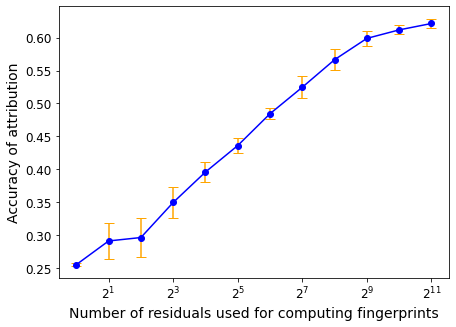

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.set_xscale('log', basex=2)
ax.errorbar(num_images_list, accuracies_mean, yerr=accuracies_std, fmt='bo', ls='-', ecolor='orange', capsize=5)
ax.set_xlabel('Number of residuals used for computing fingerprints')
ax.set_ylabel('Accuracy of attribution')

plt.savefig('accuracy-vs-numresiduals.pdf',bbox_inches='tight')

In [ ]:
#welch's t-test on the accuracy values obtained for the two algorithms
from scipy import stats

samplesA = [accuracies[i][-2] for i in range(num_trials)]
samplesB = [accuracies[i][-1] for i in range(num_trials)]

stats.ttest_ind(samplesA, samplesB, equal_var=False)

Ttest_indResult(statistic=-1.9504630411783153, pvalue=0.08700492768791518)